Cell for data intro/explanation 

In [33]:
#basic imports
import pandas as pd
import numpy as np

#visuals 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#cross valdiation metrics 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm


#ignore warnings 
import warnings
warnings.filterwarnings("ignore")

#time
import time

In [34]:
#read in data
df = pd.read_csv('https://www.dropbox.com/s/alspmiuicgd12kd/covtype.csv?dl=1') 
df.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

Fantastic! No null values, which means this was well collected data. It also seems all columns are represented as an integer, so there will be minimal data cleaning we'll have to do here. 

In [36]:
df.nunique()

Elevation                             1978
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               2
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

This showcases our categorical variables vs continous variables (i.e the 4 wilderness areas and the 40 different soil types are our categorical variables).

In [37]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64


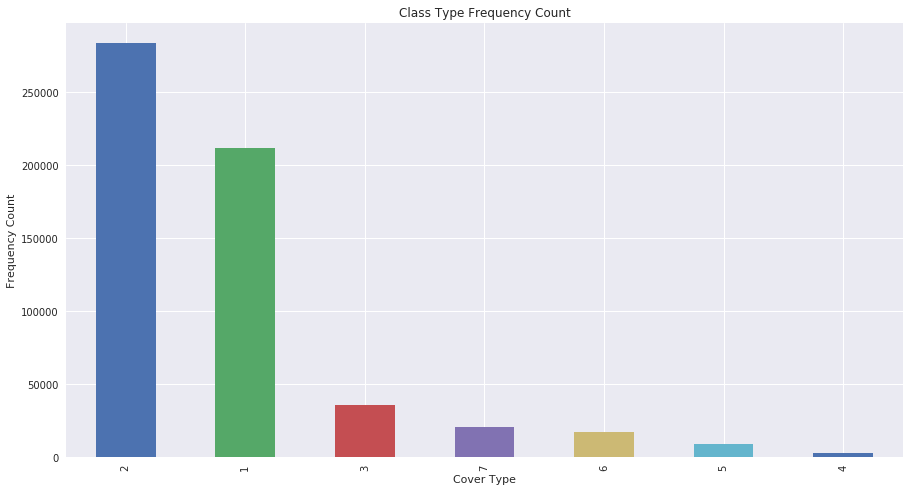

In [38]:
#set plot parameters
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.rcParams.update({'font.size': 15})

#showcase outcome distribution
df.Cover_Type.value_counts().plot(kind = "bar")
plt.xlabel('Cover Type')
plt.ylabel('Frequency Count')
plt.title('Class Type Frequency Count')
print(df.Cover_Type.value_counts())

#### Forest Cover Type Key: <br>
1.Spruce/Fir<br>
2.Lodgepole Pine<br>
3.Ponderosa Pine<br>
4.Cottonwood/Willow<br>
5.Aspen<br>
6.Douglas-fir<br>
7.Krummholz<br>

Obviously we can see there's quite a large class imbalance in this dataset. Cover_Type 1 and 2 (i.e Spruce/Fir and Lodgepole Pine) are the most heavily recorded, while the Cover_Type 4 (i.e Cottonwood/Willow) is the least.

In [39]:
#let's separate our continous and categorical data so we can preview the distributions
cont_data=df.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
wilderness_data=df.loc[:,'Wilderness_Area1':'Wilderness_Area4']
soil_data=df.loc[:,'Soil_Type1':'Soil_Type40']
results=df['Cover_Type']

In [40]:
#add in the Cover_Type to compare against one another
cont_data=pd.concat([cont_data, results], axis=1)
wilderness_data=pd.concat([wilderness_data,results],axis=1)

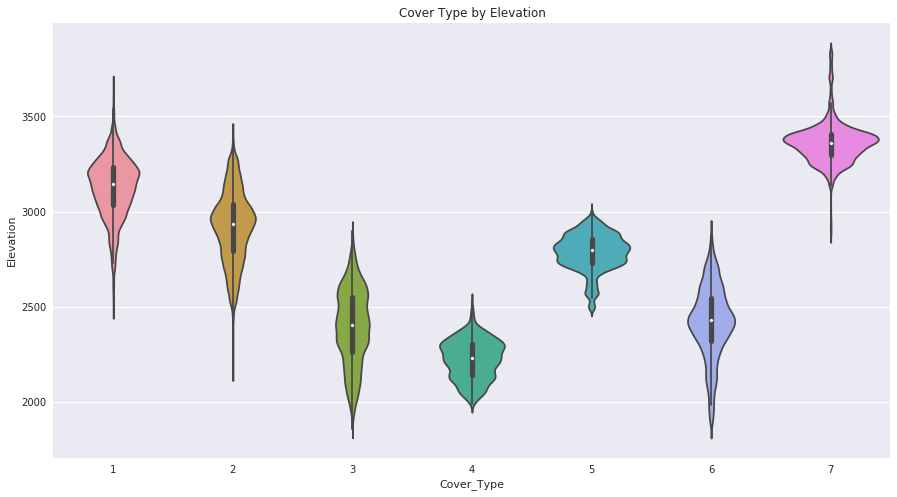

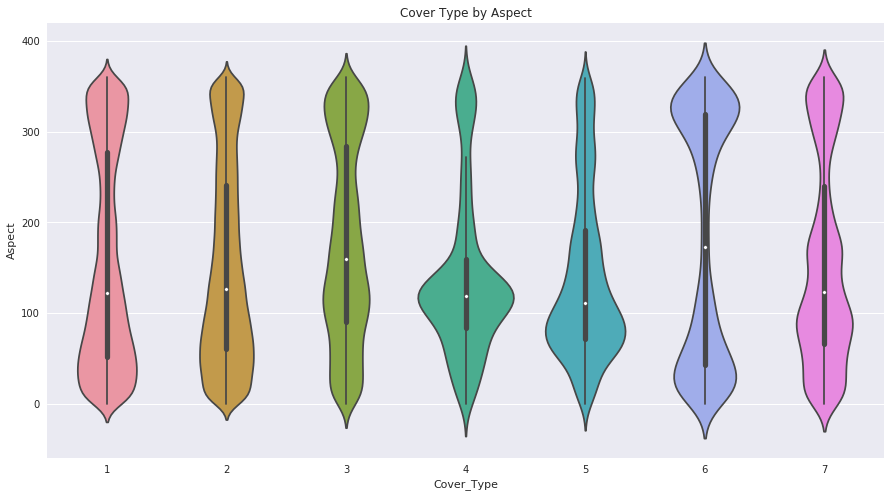

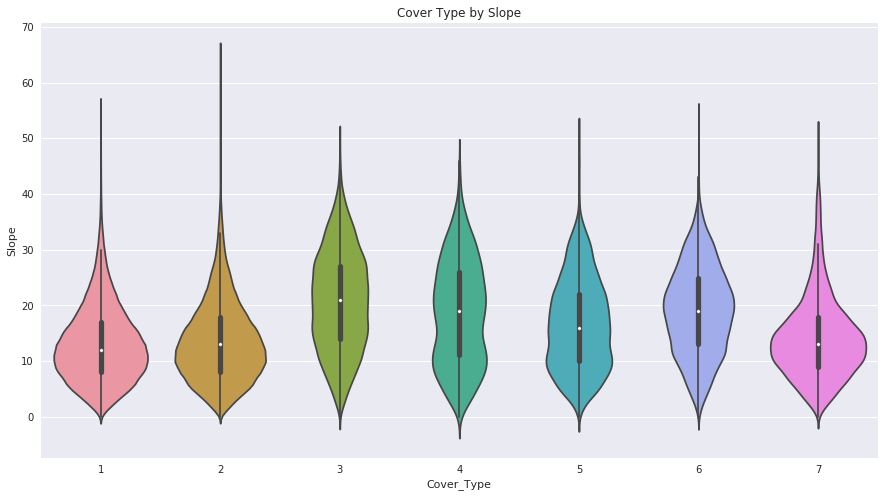

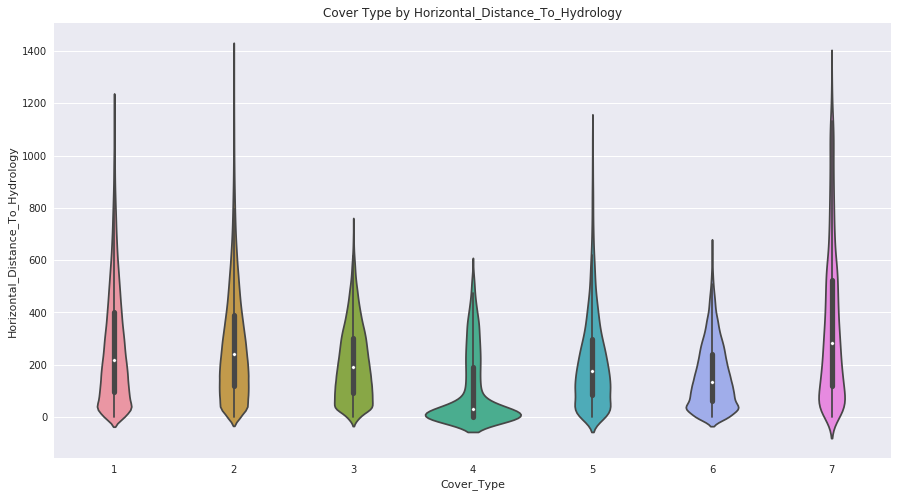

In [ ]:
for i in cont_data.columns:
    sns.violinplot(x="Cover_Type", y=cont_data[i], data=cont_data)
    plt.title('Cover Type by {}'.format(i))
    plt.show()

From the above graphs, we can discern that Elevation will likely be a good indicator of our prediction variable due to the variability amongst the different floor coverings. We can also find Slope, Horizontal Distance to Roadways, and Horizontal Distance to Fire Points as good indicators. 

In [ ]:
#Now let's check our continous variable correlation 
sns.heatmap(cont_data.corr(),linewidths=0.1, vmax=1.0,annot=True)
plt.show()

From the above correlation matrix we can see that Aspect and Hillshade_3pm are heavily correlated, Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology are heavily correlated, as well as Hillshade_Noon and Hillshade_3pm. We'll need to address this later on so we don't account for too much of the variance in the dataset and overfit our model. 

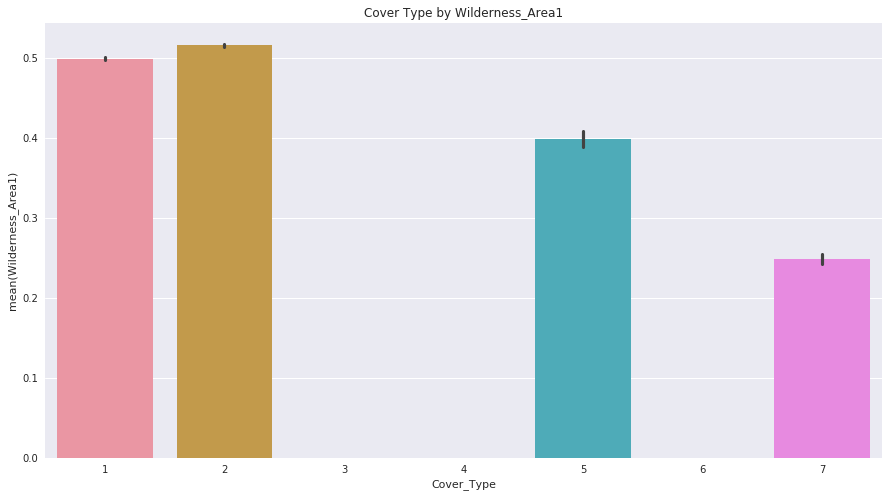

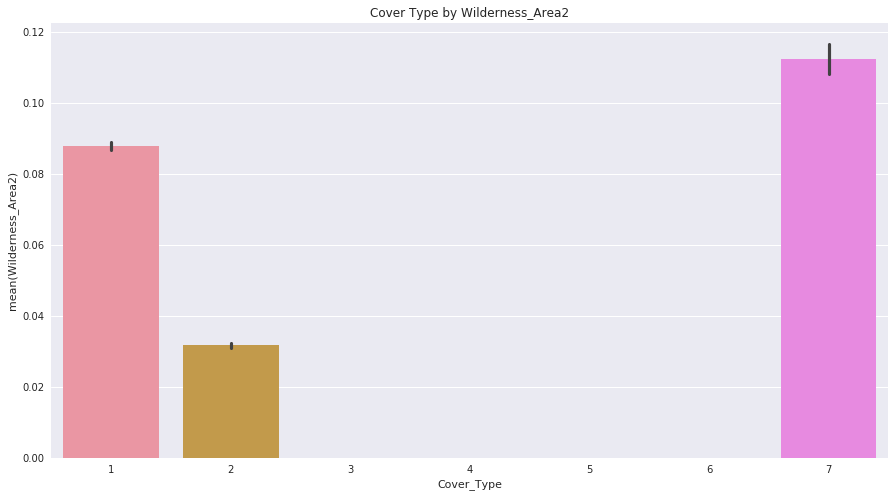

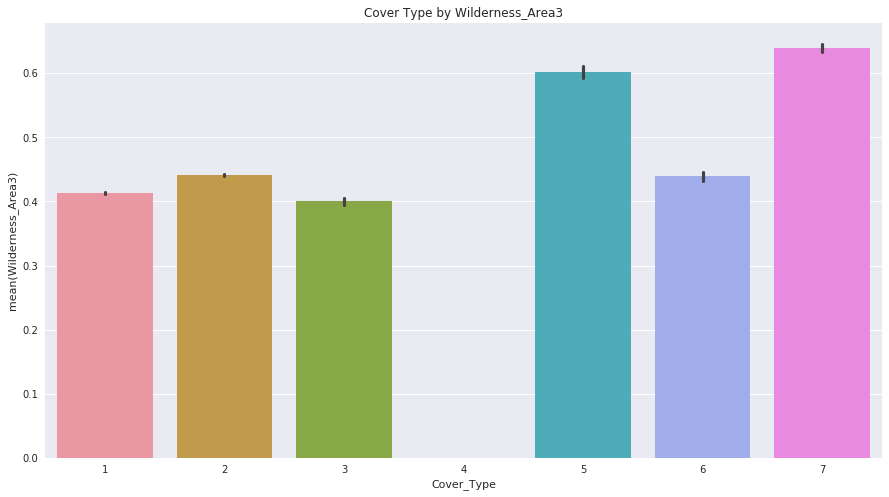

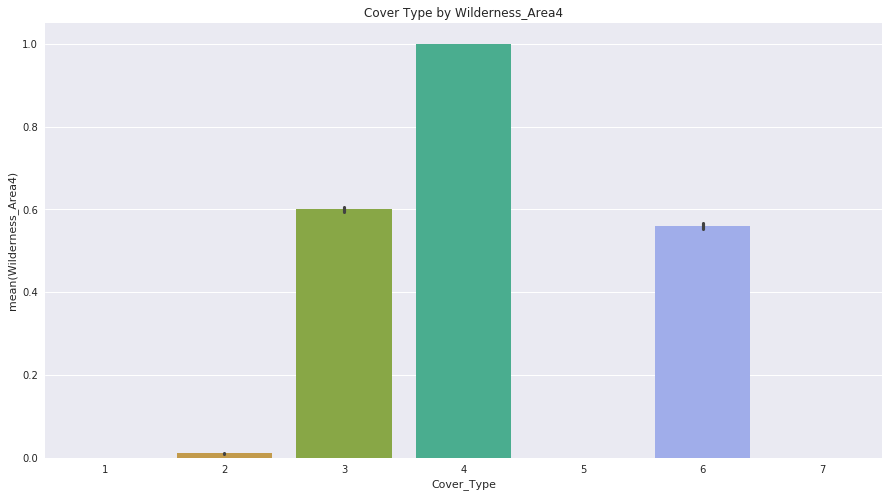

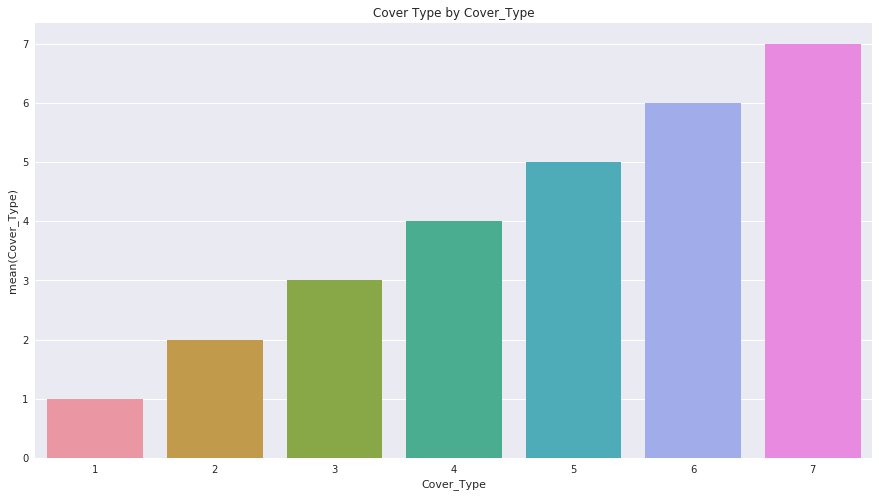

In [25]:
for i in wilderness_data.columns:
    sns.barplot(x="Cover_Type", y=wilderness_data[i], data=wilderness_data)
    plt.title('Cover Type by {}'.format(i))
    plt.show()

#### Wilderness Area Key:

1. Rawah Wilderness Area
2. Neota Wilderness Area
3. Comanche Peak Wilderness Area
4. Cache la Poudre Wilderness Area


Well from the above bar graphs we can certainly see that certain Wilderness areas are more likely to have a few specific kinds of Forest Cover Type than others, so this will likely be a good indicator for our prediction model! 

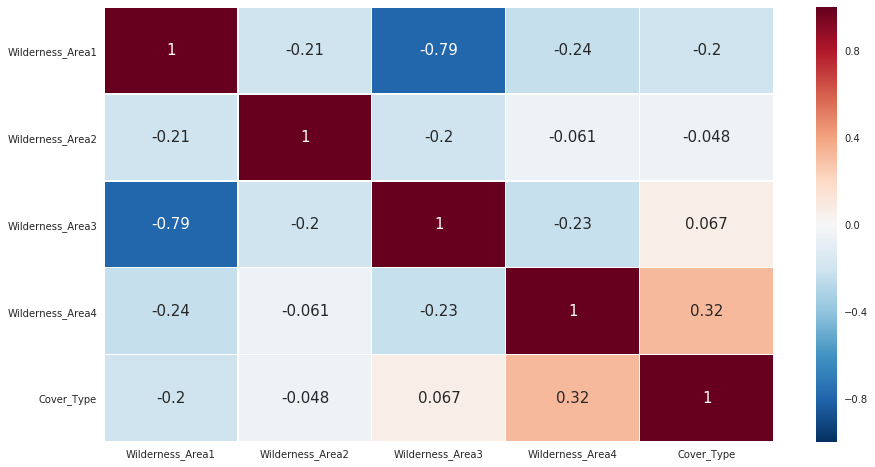

In [26]:
#let's do a quick check for variable correlation amongst the wilderness area's 
sns.heatmap(wilderness_data.corr(), linewidths=0.1, vmax=1.0, annot=True)
plt.show()

Looks pretty good, it doesn't seem that these are too very correlated, other than wilderness area 3 and 1 being a bit inversely correlated. ****does this matter?  

In [27]:
wilderness_data.apply(pd.Series.value_counts)

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,320216.0,551128.0,327648.0,544044.0,NaN
1,260796.0,29884.0,253364.0,36968.0,211840.0
2,NaN,NaN,NaN,NaN,283301.0
3,NaN,NaN,NaN,NaN,35754.0
4,NaN,NaN,NaN,NaN,2747.0
5,NaN,NaN,NaN,NaN,9493.0
6,NaN,NaN,NaN,NaN,17367.0
7,NaN,NaN,NaN,NaN,20510.0


From the above value counts we can see that Wilderness Area 1 and 3 are more densely recorded than 2 and 4. 

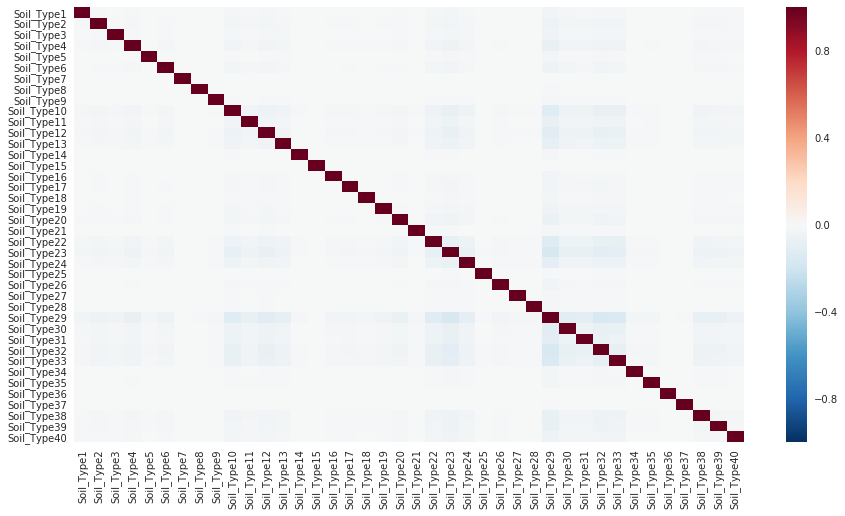

In [35]:
#let's now visualize our soil types correlation 
sns.heatmap(soil_data.corr())
plt.show()

#### Soil Type Key:

1. Cathedral family - Rock outcrop complex, extremely stony<br>
2. Vanet - Ratake families complex, very stony<br>
3. Haploborolis - Rock outcrop complex, rubbly<br>
4. Ratake family - Rock outcrop complex, rubbly<br>
5. Vanet family - Rock outcrop complex complex, rubbly<br>
6. Vanet - Wetmore families - Rock outcrop complex, stony<br>
7. Gothic family<br>
8. Supervisor - Limber families complex<br>
9. Troutville family, very stony<br>
10. Bullwark - Catamount families - Rock outcrop complex, rubbly<br>
11. Bullwark - Catamount families - Rock land complex, rubbly. 12 Legault family - Rock land complex, stony<br>
12. Unknown<br>
13. Catamount family - Rock land - Bullwark family complex, rubbly<br>
14. Pachic Argiborolis - Aquolis complex<br>
15. unspecified in the USFS Soil and ELU Survey<br>
16. Cryaquolis - Cryoborolis complex<br>
17. Gateview family - Cryaquolis complex<br>
18. Rogert family, very stony<br>
19. Typic Cryaquolis - Borohemists complex<br>
20. Typic Cryaquepts - Typic Cryaquolls complex <br>
21. Typic Cryaquolls - Leighcan family, till substratum complex<br>
22. Leighcan family, till substratum, extremely bouldery<br>
23. Leighcan family, till substratum - Typic Cryaquolls complex<br>
24. Leighcan family, extremely stony<br>
25. Leighcan family, warm, extremely stony<br>
26. Granile - Catamount families complex, very stony<br>
27. Leighcan family, warm - Rock outcrop complex, extremely stony<br>
28. Leighcan family - Rock outcrop complex, extremely stony<br>
29. Como - Legault families complex, extremely stony<br>
30. Como family - Rock land - Legault family complex, extremely stony<br>
31. Leighcan - Catamount families complex, extremely stony<br>
32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony<br>
33. Leighcan - Catamount families - Rock outcrop complex, extremely stony<br>
34. Cryorthents - Rock land complex, extremely stony<br>
35. Cryumbrepts - Rock outcrop - Cryaquepts complex<br>
36. Bross family - Rock land - Cryumbrepts complex, extremely stony<br>
37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony<br>
38. Leighcan - Moran families - Cryaquolls complex, extremely stony<br>
39. Moran family - Cryorthents - Leighcan family complex, extremely stony<br>
40. Moran family - Cryorthents - Rock land complex, extremely stony<br>

This looks great! Seems that our soil types differentiate from one another rather well.

In [ ]:
soil_data.apply(pd.Series.value_counts)

In [ ]:
#what kind of feature eng can we do here? 

In [ ]:
#feature selection

In [ ]:
#model

In [ ]:
#conclusion 